# How often do we expect repeats in a given sequence?

In [175]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

In [204]:
def rand_sequence(length):
    """Generate a random nucleotide sequence of given length encoded as integers in [0, 4]"""
    idx = np.random.randint(4, size=length)
#     return np.asarray([nucleotides[x] for x in idx], dtype='')
    return idx

In [ ]:
plt.hist(rand_sequence(1000000000))

In [177]:
def find_ngrams(input_list, n):
    return zip(*[input_list[i:] for i in range(n)])

In [178]:
list(find_ngrams("abcdefghijklmnop", 3))

[('a', 'b', 'c'),
 ('b', 'c', 'd'),
 ('c', 'd', 'e'),
 ('d', 'e', 'f'),
 ('e', 'f', 'g'),
 ('f', 'g', 'h'),
 ('g', 'h', 'i'),
 ('h', 'i', 'j'),
 ('i', 'j', 'k'),
 ('j', 'k', 'l'),
 ('k', 'l', 'm'),
 ('l', 'm', 'n'),
 ('m', 'n', 'o'),
 ('n', 'o', 'p')]

In [179]:
def n_repeats_sim(seq_len, w_len, trials):
    trial_results = []
    for i in range(trials):
        l = rand_sequence(seq_len)
        c = Counter(find_ngrams(l, w_len))

        n_repeats = 0
        for item in c.items():
            if item[1] > 1: 
                n_repeats += (item[1] - 1)
        trial_results.append(n_repeats)
    
    return np.mean(trial_results)

def theoretical_n_repeats(seq_len, w_len):
    return np.power(seq_len, 2) / np.power(4, w_len)

In [198]:
N = 50000
t = 20
max_w_len = 20
x = range(1, max_w_len)
y_sim = []
y_t = []
for i in x:
    y_sim.append(n_repeats_sim(seq_len=N, w_len=i, trials=t))
    y_t.append(theoretical_n_repeats(seq_len=N, w_len=i))

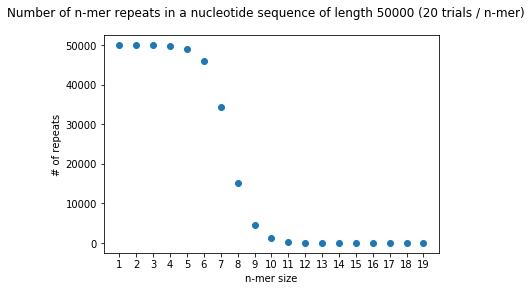

In [203]:
fig,ax = plt.subplots()
_=plt.scatter(x=x, y=y_sim)
# _=plt.scatter(x=x, y=y_t)
_=plt.xticks(x)
_=ax.set_xlabel('n-mer size')
_=ax.set_ylabel('# of repeats')
# _=ax.set_yscale("log")
# _=ax.legend(["simulation", "theoretical"])
_=fig.suptitle('Number of n-mer repeats in a nucleotide sequence of length %d (%d trials / n-mer)' % (N, t))

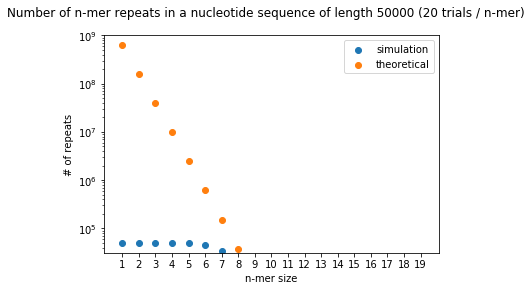

In [200]:
fig,ax = plt.subplots()
_=plt.scatter(x=x, y=y_sim)
_=plt.scatter(x=x, y=y_t)
_=plt.xticks(x)
_=ax.set_xlabel('n-mer size')
_=ax.set_ylabel('# of repeats')
_=ax.set_yscale("log")
_=ax.legend(["simulation", "theoretical"])
_=fig.suptitle('Number of n-mer repeats in a nucleotide sequence of length %d (%d trials / n-mer)' % (N, t))

In [ ]:
ACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTAACTTGCCTACCGGCTA